In [ ]:
'''
LESSION 3
 - Creating functions 
 - Reading from EXCEL 
 - Exporting to EXCEL 
 - Outliers 
 - Lambda functions 
 - Slice and dice data
'''

In [4]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy.random as np
import sys
import matplotlib

%matplotlib inline


In [6]:

print('Python version ' + sys.version)
print('Pandas version: ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 2.7.13 |Anaconda 4.3.0 (64-bit)| (default, Dec 19 2016, 13:29:36) [MSC v.1500 64 bit (AMD64)]
Pandas version: 0.19.2
Matplotlib version 2.0.0


In [8]:
# set seed
np.seed(111)

# Function to generate test data
def CreateDataSet(Number=1):
    
    Output = []
    
    for i in range(Number):
        
        # Create a weekly (mondays) date range
        rng = pd.date_range(start='1/1/2009', end='12/31/2012', freq='W-MON')
        
        # Create random data
        data = np.randint(low=25,high=1000,size=len(rng))
        
        # Status pool
        status = [1,2,3]
        
        # Make a random list of statuses
        random_status = [status[np.randint(low=0,high=len(status))] for i in range(len(rng))]
        
        # State pool
        states = ['GA','FL','fl','NY','NJ','TX']
        
        # Make a random list of states 
        random_states = [states[np.randint(low=0,high=len(states))] for i in range(len(rng))]
    
        Output.extend(zip(random_states, random_status, data, rng))
        
    return Output

In [19]:
dataset = CreateDataSet(4)
df = pd.DataFrame(data=dataset, columns=['State','Status','CustomerCount','StatusDate'])
df.info

<bound method DataFrame.info of     State  Status  CustomerCount StatusDate
0      FL       2            454 2009-01-05
1      FL       1            319 2009-01-12
2      TX       2             78 2009-01-19
3      NJ       3            691 2009-01-26
4      NJ       3            634 2009-02-02
5      TX       3            932 2009-02-09
6      fl       3            376 2009-02-16
7      NJ       2             92 2009-02-23
8      NY       2            672 2009-03-02
9      NJ       3            153 2009-03-09
10     TX       3            167 2009-03-16
11     GA       2            938 2009-03-23
12     GA       1             63 2009-03-30
13     TX       2            615 2009-04-06
14     NJ       3            813 2009-04-13
15     fl       1            788 2009-04-20
16     GA       2            601 2009-04-27
17     fl       3            371 2009-05-04
18     NJ       1            199 2009-05-11
19     fl       2            405 2009-05-18
20     NJ       3            397 2009-05-25


In [10]:
df.head()

,State,Status,CustomerCount,StatusDate
0,GA,1,877,2009-01-05
1,FL,1,901,2009-01-12
2,fl,3,749,2009-01-19
3,FL,3,111,2009-01-26
4,GA,1,300,2009-02-02


In [20]:
# Save results to excel
df.to_excel('Lesson3.xlsx', index=False)
print('Done')

Done


In [ ]:
'''
Grab Data from Excel
'''

In [12]:
pd.read_excel?

In [21]:
# Location of file
Location = r'C:\Users\cr\Documents\UCM 4\MD\teamMin\tutorial_pandas\Lesson3.xlsx'

# Parse a specific sheet
df = pd.read_excel(Location, 0, index_col='StatusDate')
df.dtypes


State            object
Status            int64
CustomerCount     int64
dtype: object

In [22]:
df.index

DatetimeIndex(['2009-01-05', '2009-01-12', '2009-01-19', '2009-01-26',
               '2009-02-02', '2009-02-09', '2009-02-16', '2009-02-23',
               '2009-03-02', '2009-03-09',
               ...
               '2012-10-29', '2012-11-05', '2012-11-12', '2012-11-19',
               '2012-11-26', '2012-12-03', '2012-12-10', '2012-12-17',
               '2012-12-24', '2012-12-31'],
              dtype='datetime64[ns]', name=u'StatusDate', length=836, freq=None)

In [23]:
df.head()

,State,Status,CustomerCount
StatusDate,,,
2009-01-05,FL,2,454
2009-01-12,FL,1,319
2009-01-19,TX,2,78
2009-01-26,NJ,3,691
2009-02-02,NJ,3,634


In [ ]:
'''
Prepare Data
This section attempts to clean up the data for analysis.

   1 Make sure the state column is all in upper case
   2 Only select records where the account status is equal to "1"
   3 Merge (NJ and NY) to NY in the state column
   4 Remove any outliers (any odd results in the data set)
Lets take a quick look on how some of the State values are upper case and some are lower case
'''

In [27]:
df['State'].unique()

array([u'FL', u'TX', u'NJ', u'NY', u'GA'], dtype=object)

In [25]:
# Clean State Column, convert to upper case
df['State'] = df.State.apply(lambda x: x.upper())

In [28]:
df['State'].unique()

array([u'FL', u'TX', u'NJ', u'NY', u'GA'], dtype=object)

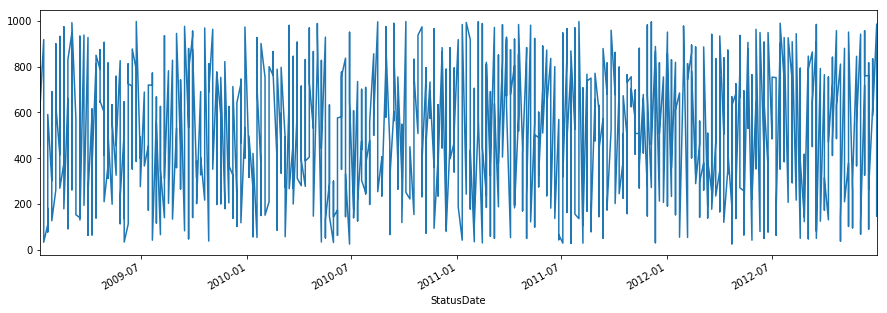

In [32]:
df['CustomerCount'].plot(figsize=(15,5));

In [34]:
sortdf = df[df['State']=='NY'].sort_index(axis=0)
sortdf.head(10)

,State,Status,CustomerCount
StatusDate,,,
2009-01-05,NY,1,681
2009-01-19,NY,3,591
2009-01-19,NY,3,110
2009-02-02,NY,3,900
2009-03-02,NY,2,672
2009-03-09,NY,2,352
2009-03-09,NY,2,236
2009-03-16,NY,1,140
2009-03-23,NY,2,538


In [35]:
# Group by State and StatusDate
Daily = df.reset_index().groupby(['State','StatusDate']).sum()
Daily.head()

Status  CustomerCount
State StatusDate                       
FL    2009-01-05       5           1253
      2009-01-12       7           1270
      2009-01-26       1            127
      2009-02-02       1            261
      2009-02-16       6            555

In [36]:
del Daily['Status']
Daily.head()

CustomerCount
State StatusDate               
FL    2009-01-05           1253
      2009-01-12           1270
      2009-01-26            127
      2009-02-02            261
      2009-02-16            555

In [37]:
# What is the index of the dataframe
Daily.index

MultiIndex(levels=[[u'FL', u'GA', u'NJ', u'NY', u'TX'], [2009-01-05 00:00:00, 2009-01-12 00:00:00, 2009-01-19 00:00:00, 2009-01-26 00:00:00, 2009-02-02 00:00:00, 2009-02-09 00:00:00, 2009-02-16 00:00:00, 2009-02-23 00:00:00, 2009-03-02 00:00:00, 2009-03-09 00:00:00, 2009-03-16 00:00:00, 2009-03-23 00:00:00, 2009-03-30 00:00:00, 2009-04-06 00:00:00, 2009-04-13 00:00:00, 2009-04-20 00:00:00, 2009-04-27 00:00:00, 2009-05-04 00:00:00, 2009-05-11 00:00:00, 2009-05-18 00:00:00, 2009-05-25 00:00:00, 2009-06-01 00:00:00, 2009-06-08 00:00:00, 2009-06-15 00:00:00, 2009-06-22 00:00:00, 2009-06-29 00:00:00, 2009-07-06 00:00:00, 2009-07-13 00:00:00, 2009-07-20 00:00:00, 2009-07-27 00:00:00, 2009-08-03 00:00:00, 2009-08-10 00:00:00, 2009-08-17 00:00:00, 2009-08-24 00:00:00, 2009-08-31 00:00:00, 2009-09-07 00:00:00, 2009-09-14 00:00:00, 2009-09-21 00:00:00, 2009-09-28 00:00:00, 2009-10-05 00:00:00, 2009-10-12 00:00:00, 2009-10-19 00:00:00, 2009-10-26 00:00:00, 2009-11-02 00:00:00, 2009-11-09 00:00:00

In [39]:
# Select the State index
Daily.index.levels[0]

Index([u'FL', u'GA', u'NJ', u'NY', u'TX'], dtype='object', name=u'State')

In [42]:
# Select the StatusDate index
Daily.index.levels[1]

DatetimeIndex(['2009-01-05', '2009-01-12', '2009-01-19', '2009-01-26',
               '2009-02-02', '2009-02-09', '2009-02-16', '2009-02-23',
               '2009-03-02', '2009-03-09',
               ...
               '2012-10-29', '2012-11-05', '2012-11-12', '2012-11-19',
               '2012-11-26', '2012-12-03', '2012-12-10', '2012-12-17',
               '2012-12-24', '2012-12-31'],
              dtype='datetime64[ns]', name=u'StatusDate', length=209, freq=None)

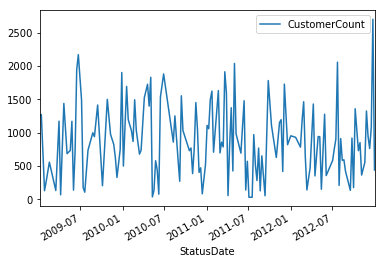

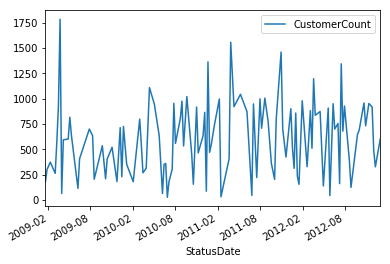

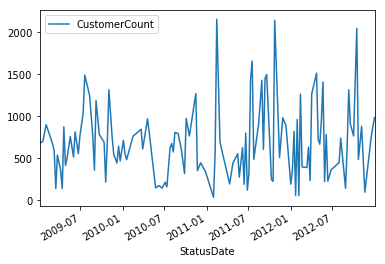

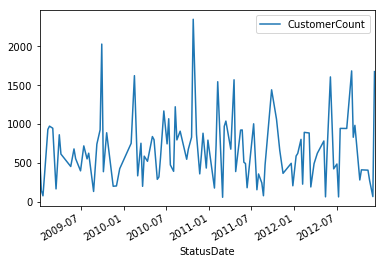

In [44]:
Daily.loc['FL'].plot()
Daily.loc['GA'].plot()
Daily.loc['NY'].plot()
Daily.loc['TX'].plot();

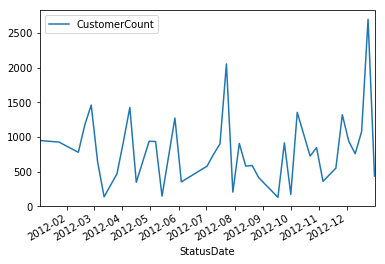

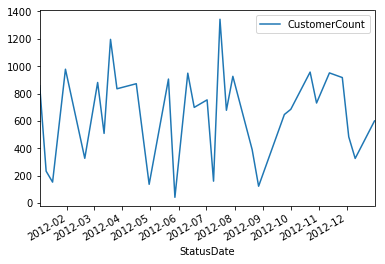

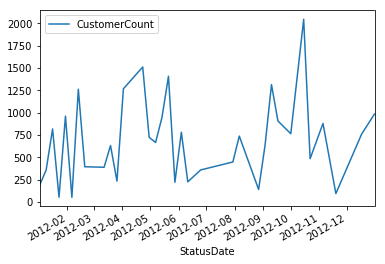

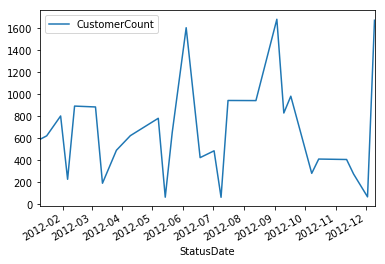

In [45]:
Daily.loc['FL']['2012':].plot()
Daily.loc['GA']['2012':].plot()
Daily.loc['NY']['2012':].plot()
Daily.loc['TX']['2012':].plot();

In [46]:
# Calculate Outliers
StateYearMonth = Daily.groupby([Daily.index.get_level_values(0), Daily.index.get_level_values(1).year, Daily.index.get_level_values(1).month])
Daily['Lower'] = StateYearMonth['CustomerCount'].transform( lambda x: x.quantile(q=.25) - (1.5*x.quantile(q=.75)-x.quantile(q=.25)) )
Daily['Upper'] = StateYearMonth['CustomerCount'].transform( lambda x: x.quantile(q=.75) + (1.5*x.quantile(q=.75)-x.quantile(q=.25)) )
Daily['Outlier'] = (Daily['CustomerCount'] < Daily['Lower']) | (Daily['CustomerCount'] > Daily['Upper']) 

# Remove Outliers
Daily = Daily[Daily['Outlier'] == False]

In [47]:
Daily.head()

CustomerCount   Lower    Upper Outlier
State StatusDate                                        
FL    2009-01-05           1253 -512.25  2463.75   False
      2009-01-12           1270 -512.25  2463.75   False
      2009-01-26            127 -512.25  2463.75   False
      2009-02-02            261  -53.25   869.25   False
      2009-02-16            555  -53.25   869.25   False

In [48]:
# Combine all markets

# Get the max customer count by Date
ALL = pd.DataFrame(Daily['CustomerCount'].groupby(Daily.index.get_level_values(1)).sum())
ALL.columns = ['CustomerCount'] # rename column

# Group by Year and Month
YearMonth = ALL.groupby([lambda x: x.year, lambda x: x.month])

# What is the max customer count per Year and Month
ALL['Max'] = YearMonth['CustomerCount'].transform(lambda x: x.max())
ALL.head()

,CustomerCount,Max
StatusDate,,
2009-01-05,2532,2532
2009-01-12,1417,2532
2009-01-19,960,2532
2009-01-26,1478,2532
2009-02-02,2119,2119


In [49]:
pd.date_range?

In [50]:
# Create the BHAG dataframe
data = [1000,2000,3000]
idx = pd.date_range(start='12/31/2011', end='12/31/2013', freq='A')
BHAG = pd.DataFrame(data, index=idx, columns=['BHAG'])
BHAG

,BHAG
2011-12-31,1000
2012-12-31,2000
2013-12-31,3000


In [51]:
# Combine the BHAG and the ALL data set 
combined = pd.concat([ALL,BHAG], axis=0)
combined = combined.sort_index(axis=0)
combined.tail()

,BHAG,CustomerCount,Max
2012-12-10,NaN,2761.0,2761.0
2012-12-17,NaN,1932.0,2761.0
2012-12-31,NaN,2024.0,2761.0
2012-12-31,2000.0,NaN,NaN
2013-12-31,3000.0,NaN,NaN


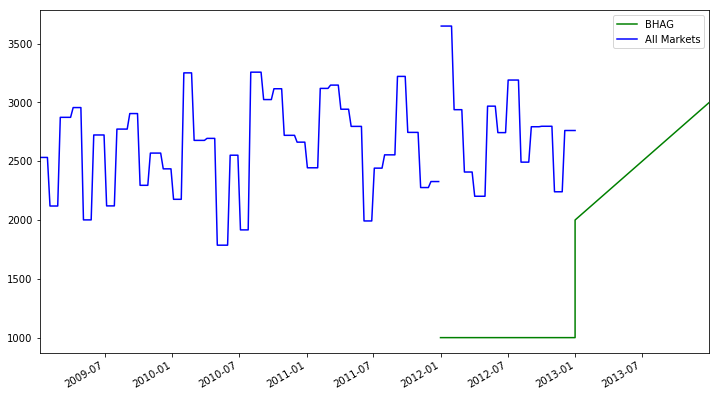

In [52]:
fig, axes = plt.subplots(figsize=(12, 7))

combined['BHAG'].fillna(method='pad').plot(color='green', label='BHAG')
combined['Max'].plot(color='blue', label='All Markets')
plt.legend(loc='best');

In [53]:
# Group by Year and then get the max value per year
Year = combined.groupby(lambda x: x.year).max()
Year

,BHAG,CustomerCount,Max
2009,NaN,2956.0,2956.0
2010,NaN,3257.0,3257.0
2011,1000.0,3221.0,3221.0
2012,2000.0,3649.0,3649.0
2013,3000.0,NaN,NaN


In [54]:
# Add a column representing the percent change per year
Year['YR_PCT_Change'] = Year['Max'].pct_change(periods=1)
Year

,BHAG,CustomerCount,Max,YR_PCT_Change
2009,NaN,2956.0,2956.0,NaN
2010,NaN,3257.0,3257.0,0.101827
2011,1000.0,3221.0,3221.0,-0.011053
2012,2000.0,3649.0,3649.0,0.132878
2013,3000.0,NaN,NaN,NaN


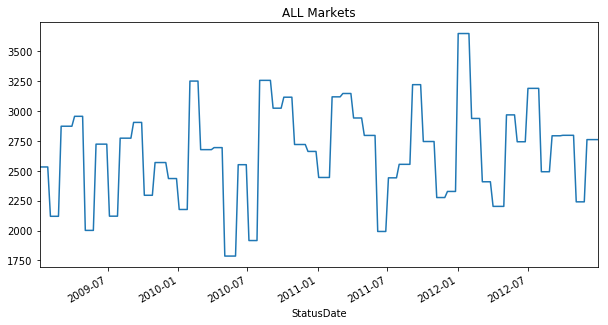

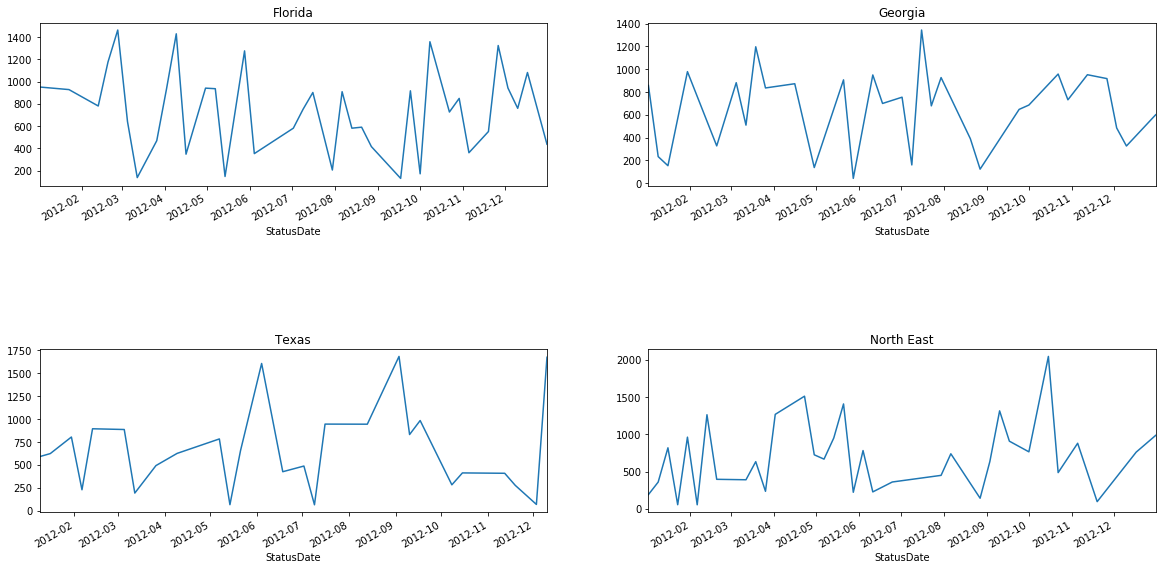

In [55]:
'''
Present Data
'''
# First Graph
ALL['Max'].plot(figsize=(10, 5));plt.title('ALL Markets')

# Last four Graphs
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
fig.subplots_adjust(hspace=1.0) ## Create space between plots

Daily.loc['FL']['CustomerCount']['2012':].fillna(method='pad').plot(ax=axes[0,0])
Daily.loc['GA']['CustomerCount']['2012':].fillna(method='pad').plot(ax=axes[0,1]) 
Daily.loc['TX']['CustomerCount']['2012':].fillna(method='pad').plot(ax=axes[1,0]) 
Daily.loc['NY']['CustomerCount']['2012':].fillna(method='pad').plot(ax=axes[1,1]) 

# Add titles
axes[0,0].set_title('Florida')
axes[0,1].set_title('Georgia')
axes[1,0].set_title('Texas')
axes[1,1].set_title('North East');